<a href="https://colab.research.google.com/github/FcoFraguas1987/DS_ML_Portfolio/blob/DS_ML_Bioinformatics/Aprendizaje_supervisado_otras_tecnicas_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TÉCNICAS DE REGRESION EN APRENDIZAJE SUPERVISADO

En esta parte vamos a trabajar con un conjunto de datos y se le va a someter a ML con técnicas como knn vecinos más cercanos y el método M5.

### Parte Inicial
El proceso lo realizaremos en R. Utilizando las bibliotecas:


*   ISLR para regresión lineal multivariable
*   kknn para k-vecinos más cercanos de regresión
*   Cubist para modelos de regresión basados en M5



In [ ]:
### Instalación de R en notebooks de Google Colab ###
!apt-get update
!apt-get install r-base
!pip install rpy2==3.5.1
%load_ext rpy2.ipython
print ("Instalación de R en Google Colab terminada")

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,622 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [830 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,374 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://secu

In [ ]:
%%R
### Instalación de las bibliotecas necesarias
#install.packages(c("ISLR", "kknn", "Cubist"))
install.packages(c("kknn", "Cubist")) #ISLR se utilizaba en la anterior cápsula
print ("Instalación de las bibliotecas de R para este módulo terminada")

### Importación de las bibliotecas necesarias ###
#require(ISLR)
require(kknn)
require(Cubist)
print ("Importación de las bibliotecas de R para este módulo terminada")

(as ‘lib’ is unspecified)


































	‘/tmp/RtmpV8foKs/downloaded_packages’



[1] "Instalación de las bibliotecas de R para este módulo terminada"


[1] "Importación de las bibliotecas de R para este módulo terminada"


In [ ]:
# Obtención de los datos
%%R
### Lectura
data <- read.csv(url("https://drive.google.com/uc?id=1GO2NBxYw54K6HkN-YgXbNadrLo5O6-0u"))

### Visualización de una pequeña parte de los datos
head(data)

  Sex  Age Tanner Height   BMI   WC TAGmgDL HDLCmgDL LDLCmgDL SBP DBP Sedentary
1   1  9.5      0   1.55 11.34 60.0      55       51       93  97  60  411.0893
2   1  8.0      0   1.15 12.40 46.3      51       70       59  90  55  435.6071
3   0 10.5      0   1.42 12.99 67.5      65       60       96  96  54  483.9048
4   0  8.1      0   1.27 13.43 53.1      41       78      100 108  46  429.2976
5   1 10.4      0   1.32 13.72 51.9      39      100      120 107  69  512.0714
6   0 10.4      0   1.29 14.02 54.9      57       76       73  87  59  451.2321
     Light Moderate  Vigorous HOMA
1 321.5804 22.13393  3.982143 1.98
2 316.9762 48.05952 14.273810 0.87
3 337.7857 33.30952  7.988095 1.46
4 241.9762 39.67857 11.821429 1.07
5 216.0357  9.75000  2.410714 0.80
6 257.6429 36.40179  9.767857 1.35


## Explicación de los datos

## Método knn vecinos más cercanos

Este método de regresión no genera un algoritmo para predecir el resultado de nuevas instancias. El método genera una clasificación de los datos de entrenamiento según la variable de salida.
Cuando queremos predecir el valor de salida de una nueva instancia, el método aloja la instacia en su sistema de clasificación o estudio, y calcula la distancia a las medidas más cercanas. El resultado de salida de la nueva instancia corresponderá a valor de salida de moda de todos esos vecinos, en el caso de clasificación, o a un valor obtenido de los valores a una distancia promedidada de los datos de entrenamientos.

---------
### Elección del valor de vecinos n:
Este es el punto crítico del modelo, ya que generaría un modelo con mala predicción si n=1 o un modelo con sobreaprendizaje si n es muiy grande.
Otro aspecto a tener en cuenta es que n debe ser impar, ya que en caso de ser par la salida puede generar un valor de empate y la predicción verse bloqueada.

El método utilizado está dentro de la librería kknn de R. Y se usa:

---------------------

kknn(formula=formula(train),train,test,k=7,distance=2,kernel="optimal",scale=TRUE)

---------------------------

De tal modo que se utilizan 7 vecinos, distancia Euclidea, con escalado y el kernel óptimo.

Vamos a ejecutar el modelo de knn vecinos con un modelo que contiene todas las variables y con el modelo linear obtenido en la cápsula anterior.

In [ ]:
%%R

fitKNN <- kknn(HOMA ~ ., data, data)
yprime = fitKNN$fitted.values
cat('\n(fórmula con todas las variables) RMSE:', sqrt(sum((data$HOMA-yprime)^2)/length(yprime)), "\n") #RECM->en inglés RMSE

fitKNN_lm <- kknn(HOMA ~ BMI+Height+TAGmgDL+Sex+WC+LDLCmgDL+I(BMI^2), data, data)
yprime = fitKNN_lm$fitted.values
cat('(fórmula obtenida con lm) RMSE:', sqrt(sum((data$HOMA-yprime)^2)/length(yprime)), "\n")


(fórmula con todas las variables) RMSE: 0.4974704 
(fórmula obtenida con lm) RMSE: 0.5062813 


Se aprecia que tenemos un modelo linar que tiene un RMSE un tanto superior al modelo obtenido por el knn. Aplicando los conocimientos del modelado linar al modelado de knn (es decir, eliminando variables que no tienen significancia estadística al problema) podemos intentar mejorar el ajuste del modelo al problema.

In [ ]:
%%R

fitKNN <- kknn(HOMA ~ .-Sex-SBP, data, data)
yprime = fitKNN$fitted.values
cat('\n(fórmula con todas las variables) RMSE:', sqrt(sum((data$HOMA-yprime)^2)/length(yprime)), "\n") #RECM->en inglés RMSE


(fórmula con todas las variables) RMSE: 0.4824407 


El RMSE se ha reducido, esto simplemente eliminando las variable sexo y SBP. Podemos incluir la variable BMI al cuadrado para esplicar la parte no linear de los valores de la variable dependiente.

In [ ]:
%%R

fitKNN <- kknn(HOMA ~ .-Sex-SBP+I(BMI^2), data, data)
yprime = fitKNN$fitted.values
cat('\n(fórmula con todas las variables) RMSE:', sqrt(sum((data$HOMA-yprime)^2)/length(yprime)), "\n") #RECM->en inglés RMSE


(fórmula con todas las variables) RMSE: 0.4590836 


El valor de RMSE se ha reducido con este modelo un 10%.


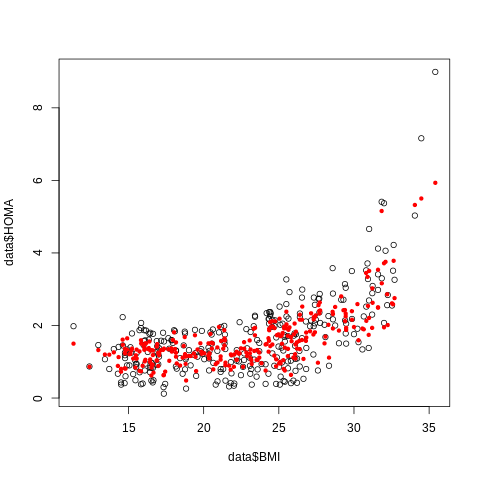

In [ ]:
# Visualizamos el modelado de knn vecinos

%%R
plot(data$HOMA~data$BMI)
points(data$BMI,yprime,col="red",pch=20)

Vemos un ajuste más óptimo que el recordado de el modelado linear.

## MODELADO M5

El modelo de M5 es un tipo de modelado que funciona como un paradigma de la modelación. Consiste en formar un árbol de regresión *model tree* de tal forma que los nodos actuan como puntos de corte par aun valor y las hojas contiene diferentes algoritmos. Obtenemos un conjunto de funciones lineales por trozos.

La fórmula de trabajo para obtener un modelado M5 es:

------------------

cubist(x,y,committees=1)

-------------------------
 Donde X se corresponde a una matriz con las variables independientes e y es un vector con los valores de salida. El número de committees da lugar al modelado M5.

 Tras el modelado será preciso aplicar una vlñaidación cruzada.


In [ ]:
%%R

tam <- length(names(data))
fitM5 <- cubist(x = data[, -tam], y = data$HOMA) #committees = 1
yprime = predict(fitM5,data)
cat('\n(M5) RMSE:', sqrt(sum((data$HOMA-yprime)^2)/length(yprime)), "\n") #RECM->en inglés RMSE

summary(fitM5)


(M5) RMSE: 0.5392671 

Call:
cubist.default(x = data[, -tam], y = data$HOMA)


Cubist [Release 2.07 GPL Edition]  Sun May 12 13:21:10 2024
---------------------------------

    Target attribute `outcome'

Read 292 cases (16 attributes) from undefined.data

Model:

  Rule 1: [120 cases, mean 1.309, range 0.26 to 3.27, est err 0.428]

    if
	Age <= 9.5
	BMI <= 30.65
    then
	outcome = -2.244 + 0.069 BMI + 0.154 Age + 0.39 Sex + 0.66 Height
	          - 0.0047 WC + 0.0017 TAGmgDL + 0.0027 HDLCmgDL
	          - 0.0012 LDLCmgDL

  Rule 2: [118 cases, mean 1.310, range 0.12 to 2.92, est err 0.419]

    if
	Age > 9.5
	BMI <= 27.3
    then
	outcome = -1.301 + 0.038 BMI + 0.0013 Sedentary + 0.67 Height
	          + 0.17 Tanner + 0.0053 HDLCmgDL - 0.0024 LDLCmgDL
	          + 0.0018 TAGmgDL - 0.0007 WC

  Rule 3: [35 cases, mean 2.217, range 0.76 to 3.58, est err 0.532]

    if
	BMI > 27.3
	BMI <= 30.65
    then
	outcome = -0.678 + 0.044 BMI + 0.79 Height + 0.0062 HDLCmgDL
	          - 0.002

Observamos que el arbol contiene en sus nodos las variables de Edad y BMi, que como se ha comprobado anteriormente parecen ser las más relevantes.

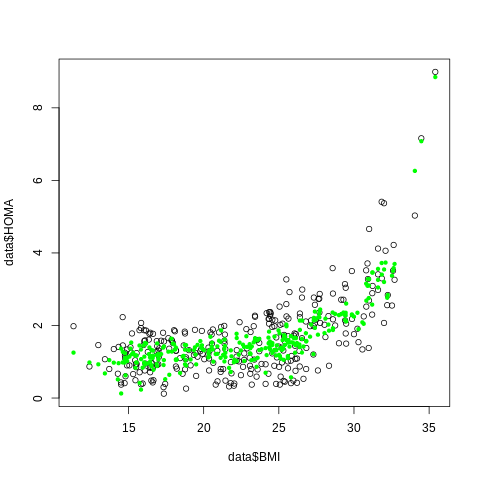

In [ ]:
#Pintamos los valreos en una gráfica

%%R
plot(data$HOMA~data$BMI)
points(data$BMI,yprime,col="green",pch=20)

## VALIDACIÓN CRUZADA PARA LOS MODELOS NO LINEALES


In [ ]:
### KNN ###

%%R
set.seed(123456)  #fijamos la misma semilla utilizada con regresión lineal

k <- 5
data$kfold <- sample(1:k, nrow(data), replace = T)

performances <- c()
# Una iteración por fold
for (fold in 1:k){
  # Se crea el conjunto de entrenamiento para la iteración
  training_set <- data[data$kfold != fold,]
  nombres <- names(training_set)
  tam <- length(nombres)-1
  training_set <- training_set[,nombres[1: tam]]

  # Se crea el conjunto de test para la iteración
  testing_set <- data[data$kfold == fold,]
  nombres <- names(testing_set)
  tam <- length(nombres)-1
  testing_set <- testing_set[,nombres[1: tam]]

  ## Entrenando el modelo para la iteración
  model <- kknn(HOMA ~ .-Sex-SBP+I(BMI^2), training_set, testing_set)

  ## Calculando el error de test
  yprime = model$fitted.values  #yprime <- predict(model, testing_set)
                                #cambiamos porque no funciona predict con kknn,
                                #ya que el propio kknn es el predict
  RMSE <- sqrt(sum((testing_set$HOMA-yprime)^2)/length(yprime))

  # Se añade el RECM a la lista de errores
  performances[fold] <- RMSE
}

#Eliminamos la columna artificial añadida para kfold
#(para que no acumule columnas si se ejecuta varias veces)
nombres <- names(data)
tam <- length(nombres)-1
data <- data[,nombres[1: tam]]

cat("RECM medio en test para 5-fcv en K-nn:", mean(performances), "y la Varianza del mismo es: ", var(performances))

RECM medio en test para 5-fcv en K-nn: 0.7929245 y la Varianza del mismo es:  0.01952734

In [ ]:
### M5 ###

%%R
set.seed(123456)  #fijamos la misma semilla utilizada con regresión lineal

k <- 5
data$kfold <- sample(1:k, nrow(data), replace = T)

performances <- c()
# Una iteración por fold
for (fold in 1:k){
  # Se crea el conjunto de entrenamiento para la iteración
  training_set <- data[data$kfold != fold,]
  nombres <- names(training_set)
  tam <- length(nombres)-1
  training_set <- training_set[,nombres[1: tam]]

  # Se crea el conjunto de test para la iteración
  testing_set <- data[data$kfold == fold,]
  nombres <- names(testing_set)
  tam <- length(nombres)-1
  testing_set <- testing_set[,nombres[1: tam]]

  ## Entrenando el modelo para la iteración
  tam <- length(names(training_set))
  model <- cubist(x = training_set[, -tam], y = training_set$HOMA) #committees = 1

  ## Calculando el error de test
  yprime <- predict(model, testing_set)
  RMSE <- sqrt(sum((testing_set$HOMA-yprime)^2)/length(yprime))

  # Se añade el RECM a la lista de errores
  performances[fold] <- RMSE
}

#Eliminamos la columna artificial añadida para kfold
#(para que no acumule columnas si se ejecuta varias veces)
nombres <- names(data)
tam <- length(nombres)-1
data <- data[,nombres[1: tam]]

cat("RECM medio en test para 5-fcv en M5:", mean(performances), "y la Varianza del mismo es: ", var(performances))

RECM medio en test para 5-fcv en M5: 0.7807851 y la Varianza del mismo es:  0.03014785

Tras realizar los modelados del aprendizaje supervisado hay que hacer una validación cruzada y obtener los valores de RMSE, el error en valores absolutos, y comprobar qué modelo da menor RMSE.